# Programming Test: Learning Activations in Neural Networks

## OBJECTIVE:
The choice of Activation Functions (AF) has proven
to be an important factor that affects the performance of an
Artificial Neural Network (ANN). Use a 1-hidden layer neural
network model that adapts to the most suitable activation
function according to the data-set. The ANN model can learn for
itself the best AF to use by exploiting a flexible functional form,
k0 + k1  x with parameters k0; k1 being learned from multiple
runs.

## TASKS:
-  **building a framework which uses the inherent clues and insights from data and bring about the most suitable AF.**
-  **Designing a neural network on MNIST Data with activation function (where parameter k0,k1 are learned from the dataset) and categorical cross-entropy loss**
-  **Final k0,k1 values at the end of training**
-  **Plot depicting changes in k0,k1 at each epoch**
-  **Training vs Test Loss**
-  **Train vs Test Accuracy**
-  **Loss Function PLot**
-  **F1-Score**

## Importing Necessary Libraries 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize 

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop,SGD
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.np_utils import to_categorical

### Downloading MNIST Dataset and Splitting it into Train & Test

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing Train & Test Dataset
x_train /= 255
x_test /= 255

# Converting Target values into categorical into matrix
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


print ('Train size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])

Train size: 60000
Test size: 10000


### Developing Models with Different Activation function to compare according to dataset with help of accuracy plot

Epoch 1/20
469/469 [==============================] - 21s 12ms/step - loss: 0.5084 - accuracy: 0.8479 - val_loss: 0.2897 - val_accuracy: 0.9194
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3112 - accuracy: 0.9115 - val_loss: 0.3012 - val_accuracy: 0.9130
Epoch 3/20
469/469 [==============================] - 6s 14ms/step - loss: 0.2949 - accuracy: 0.9185 - val_loss: 0.2958 - val_accuracy: 0.9213
Epoch 4/20
469/469 [==============================] - 5s 12ms/step - loss: 0.2855 - accuracy: 0.9187 - val_loss: 0.2938 - val_accuracy: 0.9191
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2801 - accuracy: 0.9229 - val_loss: 0.3073 - val_accuracy: 0.9139
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2768 - accuracy: 0.9227 - val_loss: 0.3058 - val_accuracy: 0.9137
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2751 - accuracy: 0.9229 - val_loss: 0.2937 - val_accuracy: 0.917

469/469 [==============================] - 5s 11ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0647 - val_accuracy: 0.9843
Epoch 19/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0680 - val_accuracy: 0.9832
Epoch 20/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0711 - val_accuracy: 0.9834
Epoch 1/20
469/469 [==============================] - 8s 13ms/step - loss: 0.4266 - accuracy: 0.8753 - val_loss: 0.1252 - val_accuracy: 0.9630
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1150 - accuracy: 0.9657 - val_loss: 0.0866 - val_accuracy: 0.9737
Epoch 3/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0688 - accuracy: 0.9795 - val_loss: 0.0788 - val_accuracy: 0.9749
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0495 - accuracy: 0.9851 - val_loss: 0.0801 - val_accuracy: 0.9763
Epoch 5/

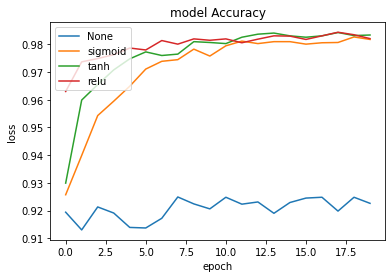

In [10]:
epochs = 20
batch_size = 128
for activation in [None, 'sigmoid', 'tanh', 'relu']:
   #Keras Model
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    
    plt.plot(history.history['val_accuracy'])
 
    
plt.title('model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')

### From the Plot we can say that 'Relu' Activation is best for our dataset so lets build and plot accuracy and loss plots

In [112]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])
   

In [113]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Records the weights throughout the training process
weights_history = []
bias_history = []

# A custom callback
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        weights, _biases = model.layers[0].get_weights()
        weights_history.append(weights)
        bias_history.append(_biases)


callback = MyCallback()

In [116]:
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[callback])



Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 1.0540 - accuracy: 0.7580 - val_loss: 0.3128 - val_accuracy: 0.9160
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3029 - accuracy: 0.9187 - val_loss: 0.2461 - val_accuracy: 0.9297
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2407 - accuracy: 0.9335 - val_loss: 0.2096 - val_accuracy: 0.9405
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2048 - accuracy: 0.9427 - val_loss: 0.1821 - val_accuracy: 0.9471
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1783 - accuracy: 0.9509 - val_loss: 0.1670 - val_accuracy: 0.9513
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1613 - accuracy: 0.9548 - val_loss: 0.1509 - val_accuracy: 0.9565
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1415 - accuracy: 0.9620 - val_loss: 0.1395 - val_accuracy: 0.9600

### Traininable Parameter Plot 

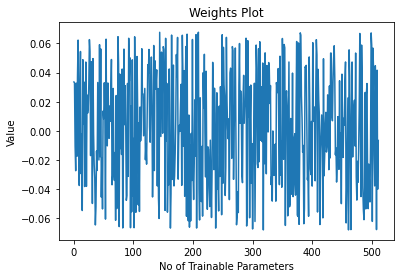

In [117]:
plt.plot(weights_history[0][1])
plt.xlabel('No of Trainable Parameters')
plt.ylabel('Value')
plt.title('Weights Plot')
plt.show()

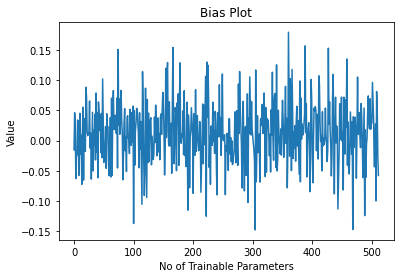

In [118]:
plt.plot(bias_history[1])
plt.xlabel('No of Trainable Parameters')
plt.ylabel('Value')
plt.title('Bias Plot')
plt.show()

### Training Vs Testing Loss Plot

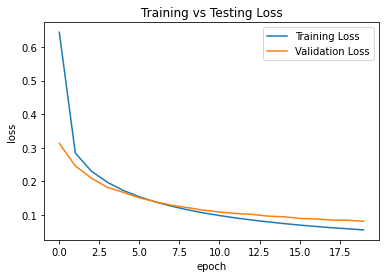

In [119]:
plt.plot(history.history['loss'])   
plt.plot(history.history['val_loss'])   
plt.title('Training vs Testing Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='best')

### Training vs Testing Accuracy Plot

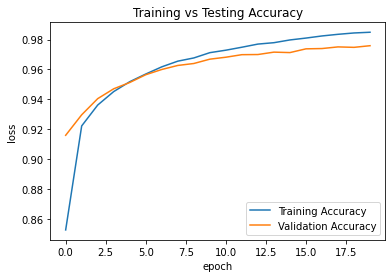

In [120]:
plt.plot(history.history['accuracy'])   
plt.plot(history.history['val_accuracy'])   
plt.title('Training vs Testing Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')

### F1 Score for the Model

In [121]:
from sklearn.metrics import f1_score
y_pred1 = model.predict(x_test,batch_size = batch_size, verbose=1)
y_pred = np.argmax(y_pred1, axis=1)
y_test1 = np.argmax(y_test, axis =1)
print("F1 Score for the Model is: {}".format(f1_score(y_test1, y_pred , average="macro")))


79/79 [==============================] - 1s 3ms/step
F1 Score for the Model is: 0.9757141257446825
